## Chapter 3
## Linear Regression

### Simple Linear Regression

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import scipy.optimize as opt
import statistics as stats
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression

It assumes that there is approximately a linear regression b/w X and y. Mathematically we can write this relationship as $$Y = \beta_0 + \beta_1 X$$
where $\beta_0$ represents _intercept_ and $\beta_1$ represents _slope_.

Once we estimate these parameters we can predict y using 
$$\hat y = \hat \beta_0 + \hat \beta_1 x$$
prediction of Y on the basis X = $x$.


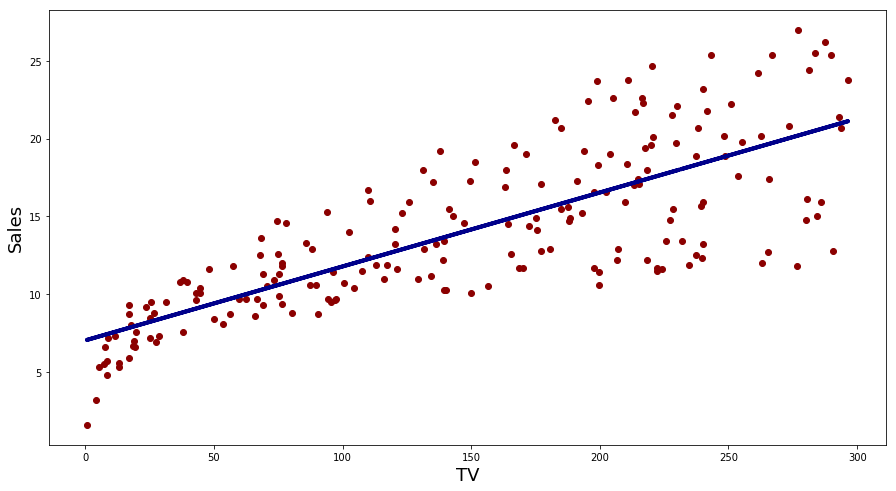

In [3]:
url = "https://raw.githubusercontent.com/atystats/ISLR_Notes_codes/master/Datasets/Advertising.csv"
plt.figure(figsize = (15,8))
Advertising = pd.read_csv(url, index_col = 0)
plt.scatter(Advertising.TV, Advertising.Sales, color = "darkred")
z = np.polyfit(Advertising.TV, Advertising.Sales, 1) # fitting a straight line
f = np.poly1d(z)
plt.plot(Advertising.TV, f(Advertising.TV), linewidth = 4.0, color = "darkblue")
plt.xlabel("TV", fontsize = 18)
plt.ylabel("Sales", fontsize = 18)
plt.show()

Let $\hat y_i = \beta_0 + \hat \beta_1 x_i$ be the prediction for Y based in the ith value of X. Then $e_i = y_i - \hat y_i$ represents the ith residual (this is the difference between the ith observed response value and the ith response value predicted by the linear model. Then residual sum of square(RSS) is $$RSS = e_1^2 + e_2^2 + .... + e_n^2$$.

According to the least square approach, we are minimizing the RSS to estimate the $\beta's$.

$$\hat \beta_1 = \frac{\sum_{i=1}^{n} (x_i - \bar x)(y_i - \bar y)}{\sum_{i=1}^{n} (x_i - \bar x)^2}$$.
and $\hat \beta_0 = \bar y - \hat \beta_1 \bar x$

These are called least square estimates of the linear regression model.

In [22]:
# We can look at the coefficient of the above equation
print(z)

[0.04753664 7.03259355]


In [28]:
# Now plotting the RSS on uncentered data won't be visually appealing so we will fit the equation on centered data.
TV = scale(Advertising.TV, with_mean = True, with_std = False)
z = np.polyfit(TV, Advertising.Sales, 1) # fitting a straight line
print(z)

[ 0.04753664 14.0225    ]


In [31]:
intercept = z[1]
slope = z[0]
b0 = np.linspace(intercept - 2, intercept + 2, 50) # selecting a range of values for intercept and slope
b1 = np.linspace(slope - 0.02, slope + 0.02, 50)
X, Y = np.meshgrid(b0, b1) # Creating the mashgrid for contour plot
rss = np.zeros((b0.size, b0.size))

#Calculating RSS for all the possible combination of coefficient values
for (i,j),k in np.ndenumerate(X):
    rss[i,j] = ((Advertising.Sales - (X[i,j] + TV.ravel() * Y[i,j]))**2).sum()/1000

# Minimum value of RSS
min_RSS = ((Advertising.Sales - (intercept + TV* slope))**2).sum()/1000
min_RSS

2.102530583131352

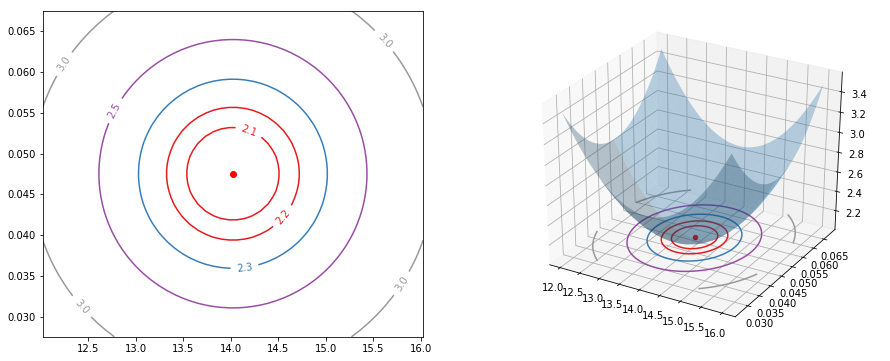

In [40]:
# Contour plot
fig = plt.figure(figsize = (15,6))
ax1 = fig.add_subplot(121)
CS = ax1.contour(X,Y,rss, cmap = plt.cm.Set1, levels = [2.15, 2.2, 2.3, 2.5, 3])
ax1.scatter(intercept, slope, color = 'r') # plotting the minimum RSS value
ax1.clabel(CS, inline=True, fontsize=10, fmt='%1.1f')

# 3D plot

ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X, Y, rss, rstride = 3, cstride = 3, alpha = 0.3) # alpha will remove the grid lines from the plot
# cmap is the set of colors. offset is used so that the contour will come on the 2D surface.
ax2.contour(X,Y,rss, cmap = plt.cm.Set1, levels = [2.15, 2.2, 2.3, 2.5, 3], offset = rss.min())
ax2.scatter3D(intercept, slope, min_RSS, color = 'r')
plt.show()

As we can see from the above 2 plots. We have plotted RSS for a number of values of $\beta$ coefficients and the least square estimates provide the minimum RSS.

#### Assesing the accuracy of coefficient estimates 

$Y = f(x) + \epsilon$

If we assume the true relationship is linear $Y = \beta_0 + \beta_1 X + \epsilon$, then 

$\beta_0$ = intercept, expected value of Y when X = 0.

$\beta_1$ = slope, the average increase in Y for unit increase in X and we assume that $\epsilon$ is independent of X.

Let's assume a model
$$Y = 2 + 3X + \epsilon$$
This is the true relationship between Y and X. We can generate some random numbers from it and use least square estimation to estimate the $\beta$ coefficients.

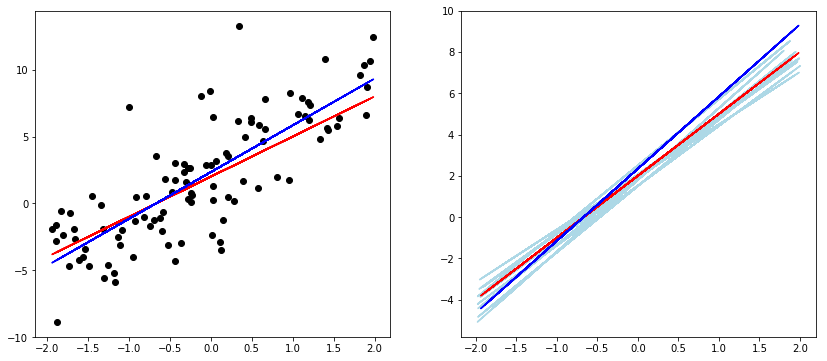

In [8]:
np.random.seed(2)
X = np.random.uniform(low = -1.99, high = 2.01, size = 100) # generating random numbers for X
e = np.random.normal(loc =0, scale = 2.5, size = 100) # generating random numbers from normal dist with mean 0.
Y = 2 + 3 * X + e # Y is coming from the model defined above
z = np.polyfit(X,Y,1) # fitting the model from the sample generated from the model
f = np.poly1d(z)

def true_f(X): # Calculating the true function
    return (2 + 3*X)

plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
plt.scatter(X,Y,color = "black", marker = 'o')
plt.plot(X, true_f(X), color = "red")
plt.plot(X, f(X), color = "blue")

plt.subplot(1,2,2)
for i in range(10):
    X1 = np.random.uniform(low = -1.99, high = 2.01, size = 100) # generating random numbers for X
    e1 = np.random.normal(loc =0, scale = 2.5, size = 100) # generating random numbers from normal dist with mean 0.
    Y1 = 2 + 3 * X1 + e1 # Y is coming from the model defined above

    z1 = np.polyfit(X1,Y1,1) # fitting the model from the sample generated from the model
    f1 = np.poly1d(z1)
    plt.plot(X1, f1(X1), color = 'lightblue')

plt.plot(X, true_f(X), color = "red")
plt.plot(X, f(X), color = "blue")
plt.show()

The red line is the true relationship, but we can use least square estimation to estimate that relationship. But we can see that different samples generated from the same model gives different straight line.

__Concept of Bias :-__ If we use $\hat \mu$ to be an estimate of $ \mu $ then this estimate is biased, in a sense that on average we expect $\hat \mu$ to equal $\mu$. In the same way we expect our least square coefficients to be equal to actual coefficients. 

__How accurate is the estimate of $\beta_0$ and $\beta_1$?__

As we have only one dataset, we have a single estimate of $\mu$. To answer closeness, we calculate standard error of $\hat \mu$ written as 
$$Var(\hat \mu) = SE(\hat \mu)^2 = \frac{\sigma^2}{n}$$

$\sigma$ = standard deviation of each of the realization $y_i$ of Y. S.E. tell us the average amount that this estimate $\hat \mu$ differs from actual value $\mu$. Also, how this deviation shrinks with n.


Similarly,
$$SE(\hat \beta_0)^2 = \sigma^2 [\frac{1}{n} + \frac{\bar x^2}{\sum_{i = 1}^{n} (x_i - \bar x)^2}]$$

and, $$SE(\hat \beta_1)^2 = \frac{\sigma^2}{\sum_{i = 1}^{n} (x_i - \bar x)^2}$$

$$\sigma^2 = Var(\epsilon)$$

In SE$(\beta_1)^2$, standard error will be smaller if the $x_i's$ are more spread out, intuitively, we have more leverage to estimate a slope in this case.
Also, if $\bar x = 0$, then $$SE(\hat \beta_0)^2 = \frac{\sigma^2}{n} = var(\hat \mu)$$

$\sigma^2$ is not known, it can be estimated from the data as $\sqrt{\frac{RSS}{(n-2}}$

Standard Error can be used to compute confidence interval.

95% confidence interval for $\beta_1$
$$\hat \beta_1 \pm 2.SE(\hat \beta_1)$$

This results holds if errors are gaussian.

__Interpretation :- __

1. In case X = 0, the value of Y will fall between {$\hat \beta_0 - 2\ S.E.(\hat \beta_0),\ \hat \beta_0 + 2\ S.E.(\hat \beta_0)$}.
2. With unit increase in value of X, Y will increase by {$\hat \beta_1 - 2\ S.E.(\hat \beta_1),\ \hat \beta_1 + 2\ S.E.(\hat \beta_1)$}


__Hypothesis testing :-__

$H_0$ :- There is no significant relationship b/w X and Y.
$H_1$ :- There is a significant relationship b/w X and Y.

Mathematically, $$H_0 : \beta_1 = 0$$
$$H_1 : \beta_1 \ne 0$$

We are testing if $\beta_1$ is sufficiently far enough from zero.

* How far is far enough?

If the $S.E.(\hat \beta_1)$ is very high, then $\beta_1$ must be large enough in order to reject $H_0$.

In contrast, if $S.E.(\hat \beta_1)$ is small, then even very small value of $\beta_1$ provide strong evidence that $\beta_1 \ne 0$ and hence there is a relationship betwen X and Y.

We compute t-statistics,
$$t = \frac{\hat \beta_0 - 0}{S.E.(\hat \beta_1)}$$

If there is no relationship, the t will follow t-distributionwith n degrees of freedom. Then, calculate the prob. of observing any value equal to |t| or larger, assuming $\beta_1 = 0$.

Small p-values indicates that it is unlikely to observe such a substantial association between the predictor and the response due to chance, in the absence of any real association between predicton and the response.


#### Assessing the accuracy of the model

The quality of the linear regression fit is typically assessed using two related quantity.

1. Residual Standard error.
2. $R^2$ statistics.

__Residual Standard error :- __

In the equation $Y = \beta_0 + \beta_1 X + \epsilon$, 

RSE is the estimate of standard deviation of $\epsilon$.

RSE is the average amount that the response will deviate from the regression line.
$$RSE = \sqrt{\frac{1}{(n-2} RSS} = \sqrt{\frac{1}{(n-2)} \sum_{i = 1}^{n} (y_i - \hat y_i)^2}$$

RSE is a measure of lack of fit. 

__Drawbacks of RSE :-__ RSE is measured in the units of Y, it is not always clear what constitutes a good RSE.

__$R^2$ Statistics :- __

Proportion of variance explained.

$$R^2 = \frac{TSS - RSS}{TSS} = 1 - \frac{RSS}{TSS}$$.

TSS = Total variance in the response Y. Amount of variability inherent in the response before the regression is performed.

RSS = Amount of variability that is left unexplained after performing the regression.

Hence, TSS - RSS = Amount of variability in the response explained by performing regression.

$R^2 statistics$ :- Measure the proportion of variability in Y that can be explained by X. It's a measure of linear relationship between X and Y. 

In simple linear regression setting, $R^2 = r^2$.

### Multiple Linear Regression

In case of more than 1 predictor, we give each predictor a seperate slope in the equation.
$$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ...... + \beta_p X_p + \epsilon$$ 

$\beta_j$ -> average effect on Y of a one unit increase in $X_j$ holding all other predictors fixed.

The parameters estimated using least square approach.
$$\hat y = \hat \beta_0 + \hat \beta_1 x_1 + \hat \beta_2 x_2 + ........ + \hat \beta_p x_p$$

We need to choose $\beta's$ to minimize the sum of squared residuals.
$$RSS = \sum_{i = 1}^{n}(y_i - \hat y_i)^2$$

__Some Important Questions :-__

__Q1. Is atleast one of the predictors useful in predicting the response?__

Our null hypothesis is 
$$H_0 : \beta_1 = \beta_2 = ..... = \beta_p = 0$$
v/s
$$H_1 : atleast\ one\ \beta_j\ is\ non-zero$$

$$F = \frac{(TSS-RSS)/p}{RSS/(n-p-1)}$$

If the linear assumptions are correct, then
$$E(RSS/(n-p-1)) = \sigma^2$$
and provided $H_0$ is true
$$E((TSS-RSS)/p) = \sigma^2$$

Hence, when there is no relationship between the predictors and response, F-statistics expected to be close to 1.
On the other hand, if $H_1$ is true, then $E((TSS-RSS)/p) > \sigma^2$, so we expect F to be greater than 1.

When n is large, an F-statistics that is just a little larger than 1 might provide evidence against $H_0$.

If $H_0$ is true, 

$\epsilon_i$ are normally distributed F-statistics follow F distribution.

Why do we neef F-statistics if we have individual t-statitics?

If $H_0 : \beta_1 = \beta_2 = ..... \beta_p = 0$ is true there are 5% chance that atleast one of the predictors is related to the response according to t-statistics.

t-statistics for individual parameters are exactly equivalent to F-test that omits that single variable from the model. So, it reports the partial effect of adding that variable to the model.

__Q2. Depending on important variables__ 

__Variable selection__ :- to select a subset of all variables that have a significant impact on the response.

1. Fit models with all the possible combinations of variables then choose a model selection criteria (AIC, BIC, adjusted R squared, Mallow's C statistics) to select a model.
2. Forward, Backward or Mixed selection.

* __Forward Selection__ :- We begin with the null model - a model with only intercept.

     We then fits p simple linear regression and add to the null model the variable that results in lowest RSS.
     
     We then add to the model the variable that results in lowest RSS for the new two-varaible model and so on.
     
     We might include some variables early that later becomes redundant.
     
* __Backward Selection__ :- We start with all variable in the model, and remove the variable with largest p-value.
     
     The new (p-1) variable model is fit, and the model with largest p-value is removed.
     
     The process may stop when all remaining variable have p-value below some threshold.
     
     Backward selection can't be used if p>n.
     
* __Mixed Selection__ :- We begin with the null model - a model with only intercept.
     
     As with forward selection, we add the variable that provides the best fit.
     
     If at point the p-value for any one of the variable in model rises above a certain threshold, then we remove that variable from the model.
     
     We continue until all variable in the model have sufficiently low p-value and all variables outside the model would have a large p-value if added to the model.

__Q3. Model Fit__

There are two measures of model fit.
1. RSE - Residual sum of squares.
2. $R^2$.

In multiple linear regression, $R^2 = Cor(Y,\hat Y)^2$. 

Our fittes model is maximizing the correlation between Y and $\hat Y$ among all the possible linear models. 

$R^2$ increase as no. of parameters increase. But if adding a new paramter is not increasing $R^2$ significantly then it might cause overfitting.
$$RSE = \sqrt{\frac{RSS}{(n-p-1)}}$$
In presence of a non-linear pattern, the residual plot will show a pattern in terms of under estimation and over estimation.

In [46]:
X = np.array(Advertising[['Radio','TV']])
y = np.array(Advertising['Sales'])

# Fitting a linear regression model with 2 predictors.
lm = LinearRegression()
lm.fit(X,y)

print(lm.coef_)
print(lm.intercept_)

[0.18799423 0.04575482]
2.9210999124051398


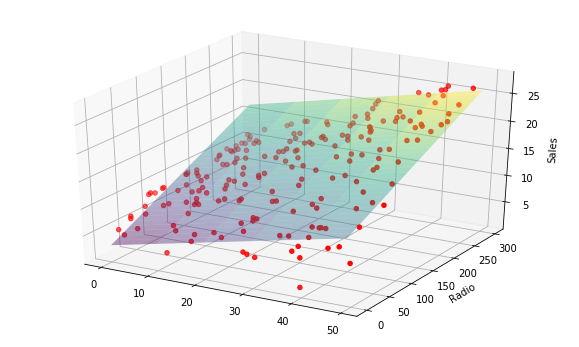

In [53]:
Radio = np.arange(0,50)
TV = np.arange(0,300)

X1, Y1 = np.meshgrid(Radio, TV)

pred = np.zeros((TV.size, Radio.size))

for (i,j),k in np.ndenumerate(pred):
    pred[i,j] = (lm.intercept_ + lm.coef_[0] * X1[i,j] + lm.coef_[1] * Y1[i,j])
    

fig = plt.figure(figsize = (10,6))
ax = plt.axes(projection='3d')

ax.plot_surface(X1, Y1, pred,cstride = 10,rstride = 10, alpha = 0.4, cmap='viridis')
ax.scatter3D(Advertising.Radio, Advertising.TV, Advertising.Sales, color ="red")
ax.set_label('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales');
plt.show()

__Q4. Prediction __

3 sorts of unertainity with predictions:-
1. Our $\beta's$ are an estimate of true regression coefficients. The inaccuracy is coefficient is related to reducible error. We can compute confidence interval in order to determine how close predicted Y will be from f(x).
2. Model Bias :- If linear assumption is not true, it will create a discrepancy in prediction.
3. Irreducible Error :- After knowing true $\beta's$, response cannot be predicted perfectly because of random error $\epsilon$ in the model. We can use prediction intervals to answer this question.

Prediction intervals are wider than confidence interval because it incorporates both reducible and irreducuble error.

Confidence interval can be used to measure closeness of average value of response.

Prediction interval can be used to measure closeness of a particular unit.